In [1]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn import preprocessing

from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt
np.random.seed(16)
from sklearn.metrics import roc_curve
from keras.models import Sequential

In [48]:
DB = pd.read_csv('diabetes.csv')

DB.describe

<bound method NDFrame.describe of      Pregnancies  Glucose  BloodPressure  SkinThickness  Insulin   BMI  \
0              6      148             72             35        0  33.6   
1              1       85             66             29        0  26.6   
2              8      183             64              0        0  23.3   
3              1       89             66             23       94  28.1   
4              0      137             40             35      168  43.1   
..           ...      ...            ...            ...      ...   ...   
763           10      101             76             48      180  32.9   
764            2      122             70             27        0  36.8   
765            5      121             72             23      112  26.2   
766            1      126             60              0        0  30.1   
767            1       93             70             31        0  30.4   

     DiabetesPedigreeFunction  Age  Outcome  
0                       0.627  

In [46]:
def PP(DB):
    
    DB['SkinThickness'] = DB['SkinThickness'].replace(0, np.nan)
    DB['Glucose'] = DB['Glucose'].replace(0, np.nan)
    DB['Insulin'] = DB['Insulin'].replace(0, np.nan)
    DB['BMI'] = DB['BMI'].replace(0, np.nan)
    DB['BloodPressure'] = DB['BloodPressure'].replace(0, np.nan)
    
    DB['SkinThickness'] = DB['SkinThickness'].fillna(DB['SkinThickness'].mean())
    DB['Glucose'] = DB['Glucose'].fillna(DB['Glucose'].mean())
    DB['Insulin'] = DB['Insulin'].fillna(DB['Insulin'].mean())
    DB['BMI'] = DB['BMI'].fillna(DB['BMI'].mean())
    DB['BloodPressure'] = DB['BloodPressure'].fillna(DB['BloodPressure'].mean())
    
    DB_std = preprocessing.scale(DB)
    DB_std = pd.DataFrame(DB_std, columns = DB.columns)
    
    DB_std['Outcome'] = DB['Outcome']
    DB = DB_std
    

    return DB

In [47]:
DB

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,0.639947,0.865108,-0.033518,6.655021e-01,-2.457063e-17,0.166292,0.468492,1.425995,1
1,-0.844885,-1.206162,-0.529859,-1.746338e-02,-2.457063e-17,-0.852531,-0.365061,-0.190672,0
2,1.233880,2.015813,-0.695306,7.327087e-17,-2.457063e-17,-1.332833,0.604397,-0.105584,1
3,-0.844885,-1.074652,-0.529859,-7.004289e-01,-7.243887e-01,-0.634212,-0.920763,-1.041549,0
4,-1.141852,0.503458,-2.680669,6.655021e-01,1.465506e-01,1.548980,5.484909,-0.020496,1
...,...,...,...,...,...,...,...,...,...
763,1.827813,-0.680125,0.297376,2.145261e+00,2.877840e-01,0.064409,-0.908682,2.532136,0
764,-0.547919,0.010298,-0.198965,-2.451185e-01,-2.457063e-17,0.632039,-0.398282,-0.531023,0
765,0.342981,-0.022579,-0.033518,-7.004289e-01,-5.125386e-01,-0.910750,-0.685193,-0.275760,0
766,-0.844885,0.141808,-1.026200,7.327087e-17,-2.457063e-17,-0.343120,-0.371101,1.170732,1


In [7]:

X = DB.loc[:, DB.columns != 'Outcome']
y = DB.loc[:, 'Outcome']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2)

In [13]:
from sklearn.linear_model import Perceptron
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import RepeatedStratifiedKFold
from numpy import mean
from numpy import std

Perceptron_model = Perceptron()

In [63]:

cv = RepeatedStratifiedKFold(n_splits=50, n_repeats=30, random_state=1)

scores_train = cross_val_score(Perceptron_model, X_train, y_train, scoring='accuracy', cv=cv, n_jobs=-1)

print('Perceptron Training Mean Accuracy: %.2f (%.2f)' % (mean(scores_train), std(scores_train)))

scores_test = cross_val_score(Perceptron_model, X_test, y_test, scoring='accuracy', cv=cv, n_jobs=-1)

print('Perceptron Testing Mean Accuracy: %.2f (%.2f)' % (mean(scores_test), std(scores_test)))


Perceptron Training Mean Accuracy: 0.68 (0.13)
Perceptron Testing Mean Accuracy: 0.75 (0.24)


In [15]:
Perceptron_model.fit(X_train,y_train)

y_predicted = Perceptron_model.predict(X_test)

c_matrix = confusion_matrix(y_test, y_predicted)


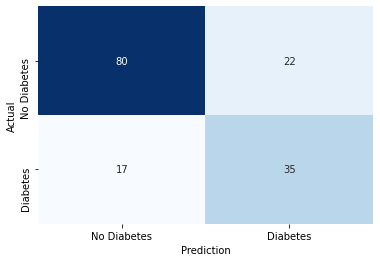

<Figure size 432x288 with 0 Axes>

In [16]:
ax = sns.heatmap(c_matrix, annot = True, xticklabels = ['No Diabetes', 'Diabetes'], yticklabels = ['No Diabetes', 'Diabetes'], cbar = False, cmap = 'Blues')
ax.set_xlabel("Prediction")
ax.set_ylabel("Actual")
plt.show()
plt.clf()

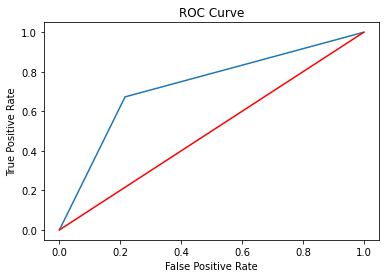

<Figure size 432x288 with 0 Axes>

In [32]:
FPR, TPR, _ = roc_curve(y_test, y_predicted)
plt.plot(FPR, TPR)

plt.plot([0,1],[0,1],'-', color='red')
plt.title('ROC Curve')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.show()
plt.clf()

In [56]:
# Multi layers model

Multi_layers_model = Sequential()
Multi_layers_model.add(Dense(32, activation = 'relu', input_dim = 8))
Multi_layers_model.add(Dense(16, activation = 'relu'))
Multi_layers_model.add(Dense(1, activation = 'sigmoid'))

Multi_layers_model.compile(optimizer = 'adam', loss = 'binary_crossentropy', metrics = ['accuracy'])
Multi_layers_model.fit(X_train, y_train, epochs = 500, verbose = False)

In [64]:
scores = Multi_layers_model.evaluate(X_train, y_train, verbose = False)
print("Multi_layers_model Training Accuracy: %.2f%%" % (scores[1] * 100))
scores = Multi_layers_model.evaluate(X_test, y_test, verbose = False)
print("Multi_layers_model Testing Accuracy: %.2f%%" % (scores[1] * 100))

Multi_layers_model Training Accuracy: 98.53%
Multi_layers_model Testing Accuracy: 80.52%
